In [4]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
import time
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from torch import nn
from ray.tune import CLIReporter
import wandb
import datetime


In [5]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
]

# De-correlated confounders in target- and test-data

In [6]:
e = datetime.datetime.now()

search_space = {
    "model":None,
    "device":"cuda",
    "loss_fn":nn.CrossEntropyLoss(),
    "epochs":500,
    "batch_size": tune.choice([32,64,128,256]),
    "optimizer":torch.optim.Adam,

    "alpha":tune.uniform(0,1),
    "lr": tune.loguniform(1e-5,1e-1),
    "weight_decay": tune.loguniform(1e-5,1e-1),
    "wandb": {
        "api_key": "10dd47062950e00af63d29317ead0331316732ff",
        "entity": "confounder_in_ml",
        "project": "Hyperparameters",
        "tags": [f"{e.day}.{e.month}.{e.year} {e.hour}:{e.minute}:{e.second}"]
    },
}
max_t = 500
samples = 30
target_domain_samples = 16


In [7]:
def plot_analysis(analysis):
    dfs = analysis.trial_dataframes
    ax = None  # This plots everything on the same plot
    for d in dfs.values():
        ax = d.mean_accuracy.plot(ax=ax, legend=False)

# BrNet

In [8]:
c = CI.confounder()
model = Models.Br_Net()
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-15 13:02:41,857	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-15 13:02:41,858	WARNING function_runner.py:603 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
2022-07-15 13:02:45,113	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(ImplicitFunc pid=4097570) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


== Status ==
Current time: 2022-07-15 13:02:53 (running for 00:00:10.95)
Memory usage on this node: 19.0/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 256.000: None | Iter 64.000: None | Iter 16.000: None | Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/10.1 GiB heap, 0.0/5.05 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_13-02-42
Number of trials: 17/30 (16 PENDING, 1 RUNNING)
+------------------------+----------+------------------------+----------+--------------+-----------+----------------+
| Trial name             | status   | loc                    |    alpha |   batch_size |        lr |   weight_decay |
|------------------------+----------+------------------------+----------+--------------+-----------+----------------|
| train_tune_a5dc3_00000 | RUNNING  | 192.168.178.26:4097570 | 0.281227 |          128 | 0.0441387 |     0.00277457 |
| train_tune_a5dc3_00001 | PENDING  |                        | 0.45186

(ImplicitFunc pid=4097570) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097570) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00000_0_alpha=0.2812,batch_size=128,lr=0.0441,weight_decay=0.0028_2022-07-15_13-02-44/wandb/run-20220715_130248-a5dc3_00000
(ImplicitFunc pid=4097570) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097570) wandb: Syncing run train_tune_a5dc3_00000
(ImplicitFunc pid=4097570) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097570) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00000


Result for train_tune_a5dc3_00000:
  date: 2022-07-15_13-02-53
  done: false
  experiment_id: e74201f14f3c4c96861748424ec5ae72
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.515625
  node_ip: 192.168.178.26
  pid: 4097570
  time_since_restore: 0.15683531761169434
  time_this_iter_s: 0.15683531761169434
  time_total_s: 0.15683531761169434
  timestamp: 1657882973
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00000
  warmup_time: 5.04478120803833
  
Result for train_tune_a5dc3_00000:
  date: 2022-07-15_13-03-01
  done: false
  experiment_id: e74201f14f3c4c96861748424ec5ae72
  hostname: fedora
  iterations_since_restore: 13
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097570
  time_since_restore: 8.7381591796875
  time_this_iter_s: 0.4031403064727783
  time_total_s: 8.7381591796875
  timestamp: 1657882981
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: a5dc3_00000
  warmup_time: 5.04478120803833
  


(ImplicitFunc pid=4097717) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097718) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097720) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097724) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097726) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097742) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097758) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4097825) wandb: Currently logg

Result for train_tune_a5dc3_00000:
  date: 2022-07-15_13-03-07
  done: false
  experiment_id: e74201f14f3c4c96861748424ec5ae72
  hostname: fedora
  iterations_since_restore: 33
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097570
  time_since_restore: 13.994070529937744
  time_this_iter_s: 0.2887086868286133
  time_total_s: 13.994070529937744
  timestamp: 1657882987
  timesteps_since_restore: 0
  training_iteration: 33
  trial_id: a5dc3_00000
  warmup_time: 5.04478120803833
  


(ImplicitFunc pid=4097717) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097717) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00001_1_alpha=0.4519,batch_size=256,lr=0.0013,weight_decay=0.0000_2022-07-15_13-02-53/wandb/run-20220715_130301-a5dc3_00001
(ImplicitFunc pid=4097717) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097717) wandb: Syncing run train_tune_a5dc3_00001
(ImplicitFunc pid=4097717) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097717) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00001
(ImplicitFunc pid=4097720) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097720) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00003_3_alpha=0.6351,batch_size=256,lr=0.0001,weight_decay=0.0040_2022-07-15_13-02-53/wandb/run-

Result for train_tune_a5dc3_00001:
  date: 2022-07-15_13-03-08
  done: true
  experiment_id: f974d5e178984e708c2aed13eaec03e6
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097717
  time_since_restore: 0.39263367652893066
  time_this_iter_s: 0.39263367652893066
  time_total_s: 0.39263367652893066
  timestamp: 1657882988
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00001
  warmup_time: 6.540901184082031
  
Result for train_tune_a5dc3_00003:
  date: 2022-07-15_13-03-08
  done: true
  experiment_id: f9a23fdb9f9a4c53a8411bfedbdb5583
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097720
  time_since_restore: 0.43529629707336426
  time_this_iter_s: 0.43529629707336426
  time_total_s: 0.43529629707336426
  timestamp: 1657882988
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00003
  warmup_time: 6.5402421951293945
  
Result for trai

(ImplicitFunc pid=4097724) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097724) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00004_4_alpha=0.5425,batch_size=32,lr=0.0000,weight_decay=0.0261_2022-07-15_13-02-53/wandb/run-20220715_130302-a5dc3_00004
(ImplicitFunc pid=4097724) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097724) wandb: Syncing run train_tune_a5dc3_00004
(ImplicitFunc pid=4097724) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097724) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00004


Result for train_tune_a5dc3_00018:
  date: 2022-07-15_13-03-09
  done: true
  experiment_id: f974d5e178984e708c2aed13eaec03e6
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097717
  time_since_restore: 0.3575561046600342
  time_this_iter_s: 0.3575561046600342
  time_total_s: 0.3575561046600342
  timestamp: 1657882989
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00018
  warmup_time: 6.540901184082031
  
Result for train_tune_a5dc3_00017:
  date: 2022-07-15_13-03-09
  done: false
  experiment_id: f9a23fdb9f9a4c53a8411bfedbdb5583
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5126953125
  node_ip: 192.168.178.26
  pid: 4097720
  time_since_restore: 0.45152878761291504
  time_this_iter_s: 0.45152878761291504
  time_total_s: 0.45152878761291504
  timestamp: 1657882989
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00017
  warmup_time: 6.5402421951293945
  
Result f

(ImplicitFunc pid=4097726) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097726) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00005_5_alpha=0.5193,batch_size=64,lr=0.0382,weight_decay=0.0008_2022-07-15_13-02-53/wandb/run-20220715_130303-a5dc3_00005
(ImplicitFunc pid=4097726) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097726) wandb: Syncing run train_tune_a5dc3_00005
(ImplicitFunc pid=4097726) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097726) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00005
(ImplicitFunc pid=4097742) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097742) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00006_6_alpha=0.9238,batch_size=128,lr=0.0001,weight_decay=0.0032_2022-07-15_13-02-54/wandb/run-2

Result for train_tune_a5dc3_00021:
  date: 2022-07-15_13-03-10
  done: true
  experiment_id: f974d5e178984e708c2aed13eaec03e6
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097717
  time_since_restore: 0.41509175300598145
  time_this_iter_s: 0.41509175300598145
  time_total_s: 0.41509175300598145
  timestamp: 1657882990
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00021
  warmup_time: 6.540901184082031
  
Result for train_tune_a5dc3_00022:
  date: 2022-07-15_13-03-10
  done: true
  experiment_id: 886682e341fd4bc9b7280fa7914ca98b
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097724
  time_since_restore: 0.3964207172393799
  time_this_iter_s: 0.3964207172393799
  time_total_s: 0.3964207172393799
  timestamp: 1657882990
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00022
  warmup_time: 6.743957996368408
  
Result for train_tu

(ImplicitFunc pid=4097825) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097825) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00009_9_alpha=0.8239,batch_size=128,lr=0.0010,weight_decay=0.0026_2022-07-15_13-02-54/wandb/run-20220715_130304-a5dc3_00009
(ImplicitFunc pid=4097825) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097825) wandb: Syncing run train_tune_a5dc3_00009
(ImplicitFunc pid=4097825) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097825) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00009
(ImplicitFunc pid=4097783) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097783) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00008_8_alpha=0.5512,batch_size=128,lr=0.0001,weight_decay=0.0001_2022-07-15_13-02-54/wandb/run-

Result for train_tune_a5dc3_00024:
  date: 2022-07-15_13-03-11
  done: false
  experiment_id: 886682e341fd4bc9b7280fa7914ca98b
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097724
  time_since_restore: 0.7989280223846436
  time_this_iter_s: 0.7989280223846436
  time_total_s: 0.7989280223846436
  timestamp: 1657882991
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00024
  warmup_time: 6.743957996368408
  
Result for train_tune_a5dc3_00025:
  date: 2022-07-15_13-03-11
  done: true
  experiment_id: f9e049b1ba00414cb3fa3d598294afca
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097742
  time_since_restore: 0.564786434173584
  time_this_iter_s: 0.564786434173584
  time_total_s: 0.564786434173584
  timestamp: 1657882991
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00025
  warmup_time: 7.596203327178955
  
Result for train

(ImplicitFunc pid=4097840) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097840) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00010_10_alpha=0.0854,batch_size=32,lr=0.0007,weight_decay=0.0000_2022-07-15_13-02-55/wandb/run-20220715_130304-a5dc3_00010
(ImplicitFunc pid=4097840) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097840) wandb: Syncing run train_tune_a5dc3_00010
(ImplicitFunc pid=4097840) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097840) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00010


Result for train_tune_a5dc3_00027:
  date: 2022-07-15_13-03-12
  done: true
  experiment_id: f9e049b1ba00414cb3fa3d598294afca
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097742
  time_since_restore: 0.6909351348876953
  time_this_iter_s: 0.6909351348876953
  time_total_s: 0.6909351348876953
  timestamp: 1657882992
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00027
  warmup_time: 7.596203327178955
  


(ImplicitFunc pid=4097885) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097885) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00011_11_alpha=0.8131,batch_size=256,lr=0.0008,weight_decay=0.0101_2022-07-15_13-02-55/wandb/run-20220715_130305-a5dc3_00011
(ImplicitFunc pid=4097885) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097885) wandb: Syncing run train_tune_a5dc3_00011
(ImplicitFunc pid=4097885) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097885) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00011
(ImplicitFunc pid=4097900) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097900) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00012_12_alpha=0.3260,batch_size=32,lr=0.0001,weight_decay=0.0916_2022-07-15_13-02-55/wandb/run

Result for train_tune_a5dc3_00000:
  date: 2022-07-15_13-03-12
  done: false
  experiment_id: e74201f14f3c4c96861748424ec5ae72
  hostname: fedora
  iterations_since_restore: 44
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097570
  time_since_restore: 19.700124502182007
  time_this_iter_s: 0.7848775386810303
  time_total_s: 19.700124502182007
  timestamp: 1657882992
  timesteps_since_restore: 0
  training_iteration: 44
  trial_id: a5dc3_00000
  warmup_time: 5.04478120803833
  


(ImplicitFunc pid=4097948) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097948) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00014_14_alpha=0.5487,batch_size=32,lr=0.0002,weight_decay=0.0030_2022-07-15_13-02-56/wandb/run-20220715_130305-a5dc3_00014
(ImplicitFunc pid=4097948) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4097948) wandb: Syncing run train_tune_a5dc3_00014
(ImplicitFunc pid=4097948) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4097948) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/a5dc3_00014
(ImplicitFunc pid=4097970) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4097970) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-02-42/train_tune_a5dc3_00015_15_alpha=0.5141,batch_size=128,lr=0.0004,weight_decay=0.0000_2022-07-15_13-02-56/wandb/run

Result for train_tune_a5dc3_00010:
  date: 2022-07-15_13-03-13
  done: false
  experiment_id: 2ae75b948bda4fe0a5153f96daf6bbac
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097840
  time_since_restore: 1.054917573928833
  time_this_iter_s: 1.054917573928833
  time_total_s: 1.054917573928833
  timestamp: 1657882993
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00010
  warmup_time: 8.125523328781128
  
Result for train_tune_a5dc3_00011:
  date: 2022-07-15_13-03-13
  done: false
  experiment_id: e83a48ebaa8e42638a03c1a7e83731b7
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4097885
  time_since_restore: 0.867375373840332
  time_this_iter_s: 0.867375373840332
  time_total_s: 0.867375373840332
  timestamp: 1657882993
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: a5dc3_00011
  warmup_time: 8.289581775665283
  
Result for train_tune_a5dc

2022-07-15 13:03:17,063	WARNING tune.py:682 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 


Result for train_tune_a5dc3_00013:
  date: 2022-07-15_13-03-17
  done: true
  experiment_id: af5e9a0e4a4f4343ba50ac4ebf394bc7
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4097929
  time_since_restore: 4.271001815795898
  time_this_iter_s: 1.0017786026000977
  time_total_s: 4.271001815795898
  timestamp: 1657882997
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: a5dc3_00013
  warmup_time: 8.19777774810791
  
== Status ==
Current time: 2022-07-15 13:03:17 (running for 00:00:35.21)
Memory usage on this node: 23.2/30.5 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 256.000: None | Iter 64.000: None | Iter 16.000: 0.519287109375 | Iter 4.000: 0.5 | Iter 1.000: 0.5
Resources requested: 11.0/16 CPUs, 0/0 GPUs, 0.0/10.1 GiB heap, 0.0/5.05 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_13-02-42
Number of trials: 30/30 (11 RUNNING, 19 TERMINATED)
+------------------------+--------

(train_tune pid=4097840) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4097840) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4097929) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4097929) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4097840) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tun

{'model': Br_Net(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
     (10): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 500,
 'batch_size': 64,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.15324292247998827,
 'lr': 0.03025771985054879,
 'weight_decay': 0.00017856909813850796,
 'wandb': {'api_key': '10dd47062950e00af63d29317ead0331316732ff',
  'entity': 'confounder_in_ml',
  'project': 'Hyperparameters',


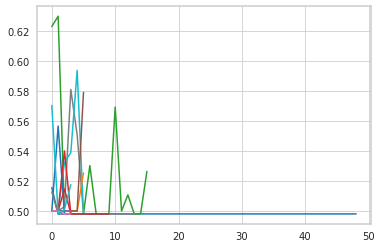

In [9]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")

# BrNet_CF_free

In [10]:
c = CI.confounder()
model = Models.Br_Net_CF_free(alpha=None)
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet CF free"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-15 13:03:25,134	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-15 13:03:28,038	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(ImplicitFunc pid=4099321) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


== Status ==
Current time: 2022-07-15 13:03:36 (running for 00:00:11.08)
Memory usage on this node: 19.2/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 256.000: None | Iter 64.000: None | Iter 16.000: None | Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/10.1 GiB heap, 0.0/5.05 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_13-03-25
Number of trials: 17/30 (16 PENDING, 1 RUNNING)
+------------------------+----------+------------------------+----------+--------------+-----------+----------------+
| Trial name             | status   | loc                    |    alpha |   batch_size |        lr |   weight_decay |
|------------------------+----------+------------------------+----------+--------------+-----------+----------------|
| train_tune_bfa26_00000 | RUNNING  | 192.168.178.26:4099321 | 0.281227 |          128 | 0.0441387 |     0.00277457 |
| train_tune_bfa26_00001 | PENDING  |                        | 0.45186

(ImplicitFunc pid=4099321) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099321) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00000_0_alpha=0.2812,batch_size=128,lr=0.0441,weight_decay=0.0028_2022-07-15_13-03-27/wandb/run-20220715_130331-bfa26_00000
(ImplicitFunc pid=4099321) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4099321) wandb: Syncing run train_tune_bfa26_00000
(ImplicitFunc pid=4099321) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4099321) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/bfa26_00000


Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-03-36
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5751953125
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 0.19307994842529297
  time_this_iter_s: 0.19307994842529297
  time_total_s: 0.19307994842529297
  timestamp: 1657883016
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  
Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-03-44
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 13
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 7.947393417358398
  time_this_iter_s: 0.4003586769104004
  time_total_s: 7.947393417358398
  timestamp: 1657883024
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  


(ImplicitFunc pid=4099623) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4099630) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4099621) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4099637) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4099633) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4099639) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4099641) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4099643) wandb: Currently logg

Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-03-49
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 31
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 13.057368040084839
  time_this_iter_s: 0.4171280860900879
  time_total_s: 13.057368040084839
  timestamp: 1657883029
  timesteps_since_restore: 0
  training_iteration: 31
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  


(ImplicitFunc pid=4099623) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099623) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00002_2_alpha=0.8288,batch_size=256,lr=0.0454,weight_decay=0.0020_2022-07-15_13-03-36/wandb/run-20220715_130345-bfa26_00002
(ImplicitFunc pid=4099623) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4099623) wandb: Syncing run train_tune_bfa26_00002
(ImplicitFunc pid=4099623) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4099623) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/bfa26_00002
(ImplicitFunc pid=4099630) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099630) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00003_3_alpha=0.6351,batch_size=256,lr=0.0001,weight_decay=0.0040_2022-07-15_13-03-36/wandb/run-

Result for train_tune_bfa26_00002:
  date: 2022-07-15_13-03-51
  done: true
  experiment_id: 2207e46ebcf64e47a30ae57e493e7e5d
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099623
  time_since_restore: 0.4612736701965332
  time_this_iter_s: 0.4612736701965332
  time_total_s: 0.4612736701965332
  timestamp: 1657883031
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00002
  warmup_time: 6.56043815612793
  


(ImplicitFunc pid=4099621) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099621) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00001_1_alpha=0.4519,batch_size=256,lr=0.0013,weight_decay=0.0000_2022-07-15_13-03-36/wandb/run-20220715_130345-bfa26_00001
(ImplicitFunc pid=4099621) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4099621) wandb: Syncing run train_tune_bfa26_00001
(ImplicitFunc pid=4099621) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4099621) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/bfa26_00001
(ImplicitFunc pid=4099637) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099637) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00005_5_alpha=0.5193,batch_size=64,lr=0.0382,weight_decay=0.0008_2022-07-15_13-03-37/wandb/run-2

Result for train_tune_bfa26_00003:
  date: 2022-07-15_13-03-52
  done: true
  experiment_id: 7ad4b468be8d4ed99310ada39cfe9c80
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099630
  time_since_restore: 0.6160211563110352
  time_this_iter_s: 0.6160211563110352
  time_total_s: 0.6160211563110352
  timestamp: 1657883032
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00003
  warmup_time: 6.494073152542114
  
Result for train_tune_bfa26_00016:
  date: 2022-07-15_13-03-52
  done: true
  experiment_id: 2207e46ebcf64e47a30ae57e493e7e5d
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099623
  time_since_restore: 0.6347355842590332
  time_this_iter_s: 0.6347355842590332
  time_total_s: 0.6347355842590332
  timestamp: 1657883032
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00016
  warmup_time: 6.56043815612793
  


(ImplicitFunc pid=4099633) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099633) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00004_4_alpha=0.5425,batch_size=32,lr=0.0000,weight_decay=0.0261_2022-07-15_13-03-36/wandb/run-20220715_130346-bfa26_00004
(ImplicitFunc pid=4099633) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4099633) wandb: Syncing run train_tune_bfa26_00004
(ImplicitFunc pid=4099633) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4099633) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/bfa26_00004
(ImplicitFunc pid=4099639) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099639) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00006_6_alpha=0.9238,batch_size=128,lr=0.0001,weight_decay=0.0032_2022-07-15_13-03-37/wandb/run-2

Result for train_tune_bfa26_00005:
  date: 2022-07-15_13-03-52
  done: true
  experiment_id: 1e8eac78c7ca4d0b9c11408c425d4df8
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099637
  time_since_restore: 0.5780787467956543
  time_this_iter_s: 0.5780787467956543
  time_total_s: 0.5780787467956543
  timestamp: 1657883032
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00005
  warmup_time: 6.853042840957642
  
Result for train_tune_bfa26_00017:
  date: 2022-07-15_13-03-52
  done: false
  experiment_id: 7ad4b468be8d4ed99310ada39cfe9c80
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099630
  time_since_restore: 0.6021575927734375
  time_this_iter_s: 0.6021575927734375
  time_total_s: 0.6021575927734375
  timestamp: 1657883032
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00017
  warmup_time: 6.494073152542114
  
Result for tr

(ImplicitFunc pid=4099643) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099643) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00008_8_alpha=0.5512,batch_size=128,lr=0.0001,weight_decay=0.0001_2022-07-15_13-03-37/wandb/run-20220715_130346-bfa26_00008
(ImplicitFunc pid=4099643) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4099643) wandb: Syncing run train_tune_bfa26_00008
(ImplicitFunc pid=4099643) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4099643) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/bfa26_00008
(ImplicitFunc pid=4099641) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099641) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00007_7_alpha=0.5286,batch_size=128,lr=0.0015,weight_decay=0.0038_2022-07-15_13-03-37/wandb/run-

Result for train_tune_bfa26_00006:
  date: 2022-07-15_13-03-53
  done: false
  experiment_id: 5d761b88f2584806b0af2066e86a41f0
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099639
  time_since_restore: 0.878392219543457
  time_this_iter_s: 0.878392219543457
  time_total_s: 0.878392219543457
  timestamp: 1657883033
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00006
  warmup_time: 7.041175365447998
  
Result for train_tune_bfa26_00004:
  date: 2022-07-15_13-03-53
  done: false
  experiment_id: 4fa4fef76a0d46d39372110841d51b8a
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099633
  time_since_restore: 1.1765282154083252
  time_this_iter_s: 1.1765282154083252
  time_total_s: 1.1765282154083252
  timestamp: 1657883033
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00004
  warmup_time: 7.009880542755127
  
Result for train_tune_b

(ImplicitFunc pid=4099660) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099660) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00009_9_alpha=0.8239,batch_size=128,lr=0.0010,weight_decay=0.0026_2022-07-15_13-03-37/wandb/run-20220715_130347-bfa26_00009
(ImplicitFunc pid=4099660) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4099660) wandb: Syncing run train_tune_bfa26_00009
(ImplicitFunc pid=4099660) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4099660) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/bfa26_00009


Result for train_tune_bfa26_00008:
  date: 2022-07-15_13-03-54
  done: false
  experiment_id: 4497db765ffb4ebd9f13469a0cd1cd71
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099643
  time_since_restore: 0.8945879936218262
  time_this_iter_s: 0.8945879936218262
  time_total_s: 0.8945879936218262
  timestamp: 1657883034
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00008
  warmup_time: 7.183087110519409
  


(ImplicitFunc pid=4099686) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099686) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00010_10_alpha=0.0854,batch_size=32,lr=0.0007,weight_decay=0.0000_2022-07-15_13-03-37/wandb/run-20220715_130347-bfa26_00010
(ImplicitFunc pid=4099686) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4099686) wandb: Syncing run train_tune_bfa26_00010
(ImplicitFunc pid=4099686) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4099686) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/bfa26_00010


Result for train_tune_bfa26_00007:
  date: 2022-07-15_13-03-54
  done: false
  experiment_id: bb7b822439f74a2897e18bae14aab929
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099641
  time_since_restore: 0.9628992080688477
  time_this_iter_s: 0.9628992080688477
  time_total_s: 0.9628992080688477
  timestamp: 1657883034
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00007
  warmup_time: 7.538825273513794
  
Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-03-54
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 40
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 18.155608415603638
  time_this_iter_s: 1.0584526062011719
  time_total_s: 18.155608415603638
  timestamp: 1657883034
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  


(ImplicitFunc pid=4099771) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099771) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00013_13_alpha=0.3853,batch_size=32,lr=0.0005,weight_decay=0.0003_2022-07-15_13-03-38/wandb/run-20220715_130348-bfa26_00013
(ImplicitFunc pid=4099771) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4099714) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099714) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00011_11_alpha=0.8131,batch_size=256,lr=0.0008,weight_decay=0.0101_2022-07-15_13-03-38/wandb/run-20220715_130347-bfa26_00011
(ImplicitFunc pid=4099714) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4099714) wandb: Syncing run train_tune_bfa26_00011
(ImplicitFunc pid=4099714) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFu

Result for train_tune_bfa26_00020:
  date: 2022-07-15_13-03-54
  done: false
  experiment_id: 1e8eac78c7ca4d0b9c11408c425d4df8
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099637
  time_since_restore: 0.6710340976715088
  time_this_iter_s: 0.6710340976715088
  time_total_s: 0.6710340976715088
  timestamp: 1657883034
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00020
  warmup_time: 6.853042840957642
  
Result for train_tune_bfa26_00009:
  date: 2022-07-15_13-03-54
  done: false
  experiment_id: 1d29502589dc417eaa8794b8360f15f4
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099660
  time_since_restore: 0.9185037612915039
  time_this_iter_s: 0.9185037612915039
  time_total_s: 0.9185037612915039
  timestamp: 1657883034
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00009
  warmup_time: 7.734712839126587
  


(ImplicitFunc pid=4099783) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099783) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00014_14_alpha=0.5487,batch_size=32,lr=0.0002,weight_decay=0.0030_2022-07-15_13-03-38/wandb/run-20220715_130348-bfa26_00014
(ImplicitFunc pid=4099783) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4099783) wandb: Syncing run train_tune_bfa26_00014
(ImplicitFunc pid=4099783) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4099783) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/bfa26_00014
(ImplicitFunc pid=4099800) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4099800) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00015_15_alpha=0.5141,batch_size=128,lr=0.0004,weight_decay=0.0000_2022-07-15_13-03-39/wandb/run

Result for train_tune_bfa26_00018:
  date: 2022-07-15_13-03-55
  done: true
  experiment_id: 2207e46ebcf64e47a30ae57e493e7e5d
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099623
  time_since_restore: 2.7774620056152344
  time_this_iter_s: 0.7839117050170898
  time_total_s: 2.7774620056152344
  timestamp: 1657883035
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: bfa26_00018
  warmup_time: 6.56043815612793
  
Result for train_tune_bfa26_00010:
  date: 2022-07-15_13-03-55
  done: false
  experiment_id: eeddfd6b643d42489cb57be96b85c37b
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099686
  time_since_restore: 1.226689100265503
  time_this_iter_s: 1.226689100265503
  time_total_s: 1.226689100265503
  timestamp: 1657883035
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: bfa26_00010
  warmup_time: 7.889064788818359
  
Result for train_tune_bfa

2022-07-15 13:03:59,141	WARNING util.py:214 -- The `callbacks.on_trial_result` operation took 0.532 s, which may be a performance bottleneck.
2022-07-15 13:03:59,143	WARNING util.py:214 -- The `process_trial_result` operation took 0.536 s, which may be a performance bottleneck.
2022-07-15 13:03:59,144	WARNING util.py:214 -- Processing trial results took 0.537 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2022-07-15 13:03:59,145	WARNING util.py:214 -- The `process_trial_result` operation took 0.538 s, which may be a performance bottleneck.


Result for train_tune_bfa26_00010:
  date: 2022-07-15_13-03-58
  done: true
  experiment_id: eeddfd6b643d42489cb57be96b85c37b
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099686
  time_since_restore: 4.469742774963379
  time_this_iter_s: 0.9984149932861328
  time_total_s: 4.469742774963379
  timestamp: 1657883038
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: bfa26_00010
  warmup_time: 7.889064788818359
  
Result for train_tune_bfa26_00006:
  date: 2022-07-15_13-03-58
  done: false
  experiment_id: 5d761b88f2584806b0af2066e86a41f0
  hostname: fedora
  iterations_since_restore: 7
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099639
  time_since_restore: 6.250370264053345
  time_this_iter_s: 0.9989264011383057
  time_total_s: 6.250370264053345
  timestamp: 1657883038
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: bfa26_00006
  warmup_time: 7.041175365447998
  
Result for train_

(train_tune pid=4099621) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4099621) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099621) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_bfa26_00015:
  date: 2022-07-15_13-04-04
  done: true
  experiment_id: 22e4247c47aa44d3b9d12cfe557010d1
  hostname: fedora
  iterations_since_restore: 16
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099800
  time_since_restore: 9.847230434417725
  time_this_iter_s: 0.35387587547302246
  time_total_s: 9.847230434417725
  timestamp: 1657883044
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: bfa26_00015
  warmup_time: 7.753298282623291
  
Result for train_tune_bfa26_00027:
  date: 2022-07-15_13-04-04
  done: false
  experiment_id: 2207e46ebcf64e47a30ae57e493e7e5d
  hostname: fedora
  iterations_since_restore: 13
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099623
  time_since_restore: 6.485865354537964
  time_this_iter_s: 0.37607574462890625
  time_total_s: 6.485865354537964
  timestamp: 1657883044
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: bfa26_00027
  warmup_time: 6.56043815612793
  
Result for t

(train_tune pid=4099621) wandb: | 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4099660) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099621) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099621) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099621) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_bfa26_00013:
  date: 2022-07-15_13-04-05
  done: true
  experiment_id: 3c51aa12fc8f4efda503f45e12e93b9d
  hostname: fedora
  iterations_since_restore: 16
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099771
  time_since_restore: 11.012685298919678
  time_this_iter_s: 0.40718603134155273
  time_total_s: 11.012685298919678
  timestamp: 1657883045
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: bfa26_00013
  warmup_time: 7.751119613647461
  


(train_tune pid=4099621) wandb: | 0.003 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099641) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4099641) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099621) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099621) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_bfa26_00014:
  date: 2022-07-15_13-04-06
  done: true
  experiment_id: 1b8e13f0cd214c8a94b13ad3c4ef3c5c
  hostname: fedora
  iterations_since_restore: 16
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099783
  time_since_restore: 11.049710035324097
  time_this_iter_s: 0.36686110496520996
  time_total_s: 11.049710035324097
  timestamp: 1657883046
  timesteps_since_restore: 0
  training_iteration: 16
  trial_id: bfa26_00014
  warmup_time: 7.932096242904663
  


(train_tune pid=4099621) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099621) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099641) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099621) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099641) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099621) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099641) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(tra

Result for train_tune_bfa26_00012:
  date: 2022-07-15_13-04-06
  done: false
  experiment_id: 51d156b78e3f42ea8024a60144ca2de9
  hostname: fedora
  iterations_since_restore: 18
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099726
  time_since_restore: 11.898267030715942
  time_this_iter_s: 0.3352475166320801
  time_total_s: 11.898267030715942
  timestamp: 1657883046
  timesteps_since_restore: 0
  training_iteration: 18
  trial_id: bfa26_00012
  warmup_time: 8.307454824447632
  


(train_tune pid=4099641) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099641) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: \ 0.010 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099641) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099641) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099641) wandb: \ 0.004 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099714) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099800) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(tra

Result for train_tune_bfa26_00024:
  date: 2022-07-15_13-04-08
  done: false
  experiment_id: 4fa4fef76a0d46d39372110841d51b8a
  hostname: fedora
  iterations_since_restore: 20
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099633
  time_since_restore: 11.118911027908325
  time_this_iter_s: 0.3080942630767822
  time_total_s: 11.118911027908325
  timestamp: 1657883048
  timesteps_since_restore: 0
  training_iteration: 20
  trial_id: bfa26_00024
  warmup_time: 7.009880542755127
  


(train_tune pid=4099641) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099714) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4099714) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099771) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4099771) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099800) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4099714) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099800) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099714) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099783) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4099783) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tun

Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-04-10
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 80
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 33.57511878013611
  time_this_iter_s: 0.29463934898376465
  time_total_s: 33.57511878013611
  timestamp: 1657883050
  timesteps_since_restore: 0
  training_iteration: 80
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  
Result for train_tune_bfa26_00006:
  date: 2022-07-15_13-04-10
  done: false
  experiment_id: 5d761b88f2584806b0af2066e86a41f0
  hostname: fedora
  iterations_since_restore: 41
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099639
  time_since_restore: 17.283942461013794
  time_this_iter_s: 0.21976995468139648
  time_total_s: 17.283942461013794
  timestamp: 1657883050
  timesteps_since_restore: 0
  training_iteration: 41
  trial_id: bfa26_00006
  warmup_time: 7.041175365447998
  
Result for train

(train_tune pid=4099771) wandb: | 0.009 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099783) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099800) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099714) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099771) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099783) wandb: | 0.003 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099771) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099783) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099800) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099771) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099783) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099660) wandb: 
(train_tune pid=4099660) wandb: Run history:
(train_tu

Result for train_tune_bfa26_00012:
  date: 2022-07-15_13-04-12
  done: false
  experiment_id: 51d156b78e3f42ea8024a60144ca2de9
  hostname: fedora
  iterations_since_restore: 35
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099726
  time_since_restore: 17.183449268341064
  time_this_iter_s: 0.3108804225921631
  time_total_s: 17.183449268341064
  timestamp: 1657883052
  timesteps_since_restore: 0
  training_iteration: 35
  trial_id: bfa26_00012
  warmup_time: 8.307454824447632
  


(train_tune pid=4099714) wandb: 
(train_tune pid=4099714) wandb: Run history:
(train_tune pid=4099714) wandb: classification_accuracy ▁▁▁▁▁██▁▁▁▁▁▁▁▁▁▁▁
(train_tune pid=4099714) wandb:     confounder_accuracy ▁▁▁▁▁▁▇███████████
(train_tune pid=4099714) wandb: 
(train_tune pid=4099714) wandb: Run summary:
(train_tune pid=4099714) wandb: classification_accuracy 0.49805
(train_tune pid=4099714) wandb:     confounder_accuracy 1.0
(train_tune pid=4099714) wandb: 
(train_tune pid=4099714) wandb: Synced train_tune_bfa26_00011: https://wandb.ai/confounder_in_ml/Hyperparameters/runs/bfa26_00011
(train_tune pid=4099714) wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
(train_tune pid=4099714) wandb: Find logs at: /home/raffi/ray_results/train_tune_2022-07-15_13-03-25/train_tune_bfa26_00011_11_alpha=0.8131,batch_size=256,lr=0.0008,weight_decay=0.0101_2022-07-15_13-03-38/wandb/run-20220715_130347-bfa26_00011/logs
(train_tune pid=4099800) wandb: 
(train_tune pid=

Result for train_tune_bfa26_00024:
  date: 2022-07-15_13-04-13
  done: false
  experiment_id: 4fa4fef76a0d46d39372110841d51b8a
  hostname: fedora
  iterations_since_restore: 36
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099633
  time_since_restore: 16.313162803649902
  time_this_iter_s: 0.31523990631103516
  time_total_s: 16.313162803649902
  timestamp: 1657883053
  timesteps_since_restore: 0
  training_iteration: 36
  trial_id: bfa26_00024
  warmup_time: 7.009880542755127
  
Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-04-15
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 102
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 38.58266568183899
  time_this_iter_s: 0.20551657676696777
  time_total_s: 38.58266568183899
  timestamp: 1657883055
  timesteps_since_restore: 0
  training_iteration: 102
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  
Result

(train_tune pid=4099623) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4099623) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099623) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099623) wandb: | 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099623) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-04-20
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 127
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 43.66098475456238
  time_this_iter_s: 0.2247302532196045
  time_total_s: 43.66098475456238
  timestamp: 1657883060
  timesteps_since_restore: 0
  training_iteration: 127
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  
Result for train_tune_bfa26_00006:
  date: 2022-07-15_13-04-20
  done: false
  experiment_id: 5d761b88f2584806b0af2066e86a41f0
  hostname: fedora
  iterations_since_restore: 89
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099639
  time_since_restore: 27.417126655578613
  time_this_iter_s: 0.20455479621887207
  time_total_s: 27.417126655578613
  timestamp: 1657883060
  timesteps_since_restore: 0
  training_iteration: 89
  trial_id: bfa26_00006
  warmup_time: 7.041175365447998
  


(train_tune pid=4099623) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099623) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099623) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099623) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099623) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099623) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099623) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_bfa26_00012:
  date: 2022-07-15_13-04-20
  done: true
  experiment_id: 51d156b78e3f42ea8024a60144ca2de9
  hostname: fedora
  iterations_since_restore: 64
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099726
  time_since_restore: 25.542623043060303
  time_this_iter_s: 0.29334330558776855
  time_total_s: 25.542623043060303
  timestamp: 1657883060
  timesteps_since_restore: 0
  training_iteration: 64
  trial_id: bfa26_00012
  warmup_time: 8.307454824447632
  


(train_tune pid=4099623) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_bfa26_00024:
  date: 2022-07-15_13-04-21
  done: true
  experiment_id: 4fa4fef76a0d46d39372110841d51b8a
  hostname: fedora
  iterations_since_restore: 64
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099633
  time_since_restore: 24.12106156349182
  time_this_iter_s: 0.24236273765563965
  time_total_s: 24.12106156349182
  timestamp: 1657883061
  timesteps_since_restore: 0
  training_iteration: 64
  trial_id: bfa26_00024
  warmup_time: 7.009880542755127
  


(train_tune pid=4099623) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)
(train_tune pid=4099623) wandb: 
(train_tune pid=4099623) wandb: Run history:
(train_tune pid=4099623) wandb: classification_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
(train_tune pid=4099623) wandb:     confounder_accuracy ████▁█▁█▁█▁▁▁▁███▁▁█▁▁▁█▁█▁█▁██▁▁▁▁▁█▁█▁
(train_tune pid=4099623) wandb: 
(train_tune pid=4099623) wandb: Run summary:
(train_tune pid=4099623) wandb: classification_accuracy 0.5
(train_tune pid=4099623) wandb:     confounder_accuracy 0.49219
(train_tune pid=4099623) wandb: 
(train_tune pid=4099623) wandb: Synced train_tune_bfa26_00002: https://wandb.ai/confounder_in_ml/Hyperparameters/runs/bfa26_00002
(train_tune pid=4099623) wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
(train_tune pid=4099623) wandb: Find logs at: /home/raffi/ray_results/trai

Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-04-25
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 159
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 48.77148127555847
  time_this_iter_s: 0.2714536190032959
  time_total_s: 48.77148127555847
  timestamp: 1657883065
  timesteps_since_restore: 0
  training_iteration: 159
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  
Result for train_tune_bfa26_00006:
  date: 2022-07-15_13-04-25
  done: false
  experiment_id: 5d761b88f2584806b0af2066e86a41f0
  hostname: fedora
  iterations_since_restore: 120
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099639
  time_since_restore: 32.47240400314331
  time_this_iter_s: 0.16152262687683105
  time_total_s: 32.47240400314331
  timestamp: 1657883065
  timesteps_since_restore: 0
  training_iteration: 120
  trial_id: bfa26_00006
  warmup_time: 7.041175365447998
  


(train_tune pid=4099726) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099726) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099726) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099726) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099633) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099726) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099726) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)
wandb:                                                                                 deduped)
(train_tune pid=4099633) wandb: 
(train_tune pid=4099633) wandb: Run history:
(train_tune pid=4099633) wandb: classification_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
(train_tune pid=4099633) wandb:     confounder_accur

Result for train_tune_bfa26_00006:
  date: 2022-07-15_13-04-30
  done: false
  experiment_id: 5d761b88f2584806b0af2066e86a41f0
  hostname: fedora
  iterations_since_restore: 153
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4099639
  time_since_restore: 37.519371032714844
  time_this_iter_s: 0.14188742637634277
  time_total_s: 37.519371032714844
  timestamp: 1657883070
  timesteps_since_restore: 0
  training_iteration: 153
  trial_id: bfa26_00006
  warmup_time: 7.041175365447998
  
Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-04-30
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 193
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 53.865232944488525
  time_this_iter_s: 0.1422736644744873
  time_total_s: 53.865232944488525
  timestamp: 1657883070
  timesteps_since_restore: 0
  training_iteration: 193
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  
Res

(train_tune pid=4099639) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4099639) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099639) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099639) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099639) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099639) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099639) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099639) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099639) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099639) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099639) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099639) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-04-50
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 335
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 74.24510526657104
  time_this_iter_s: 0.21022939682006836
  time_total_s: 74.24510526657104
  timestamp: 1657883090
  timesteps_since_restore: 0
  training_iteration: 335
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  


(train_tune pid=4099639) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)
(train_tune pid=4099639) wandb: 
(train_tune pid=4099639) wandb: Run history:
(train_tune pid=4099639) wandb: classification_accuracy ▁▁▁▁▁▁▁▁▂█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
(train_tune pid=4099639) wandb:     confounder_accuracy ▁▁▁▁▁▁▁▁▁▅██████████████████████████████
(train_tune pid=4099639) wandb: 
(train_tune pid=4099639) wandb: Run summary:
(train_tune pid=4099639) wandb: classification_accuracy 0.49805
(train_tune pid=4099639) wandb:     confounder_accuracy 1.0
(train_tune pid=4099639) wandb: 
(train_tune pid=4099639) wandb: Synced train_tune_bfa26_00006: https://wandb.ai/confounder_in_ml/Hyperparameters/runs/bfa26_00006
(train_tune pid=4099639) wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
(train_tune pid=4099639) wandb: Find logs at: ./wandb/run-20220715_130346-

Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-04-55
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 374
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 79.3568434715271
  time_this_iter_s: 0.12739086151123047
  time_total_s: 79.3568434715271
  timestamp: 1657883095
  timesteps_since_restore: 0
  training_iteration: 374
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  
Result for train_tune_bfa26_00000:
  date: 2022-07-15_13-05-00
  done: false
  experiment_id: 6ffcb3ada19a477db16d3dc5ab474d40
  hostname: fedora
  iterations_since_restore: 412
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4099321
  time_since_restore: 84.36523914337158
  time_this_iter_s: 0.13316726684570312
  time_total_s: 84.36523914337158
  timestamp: 1657883100
  timesteps_since_restore: 0
  training_iteration: 412
  trial_id: bfa26_00000
  warmup_time: 5.461113214492798
  
Result for train

(train_tune pid=4099321) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4099321) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099321) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099321) wandb: | 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4099321) wandb: / 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4099321) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099321) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099321) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099321) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099321) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099321) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4099321) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_

{'model': Br_Net_CF_free(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
   )
   (class_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
   (domain_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 500,
 'batch_size': 128,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.5141146377958077,
 'lr': 0.00040951516624352394,
 'weight_decay': 2.679

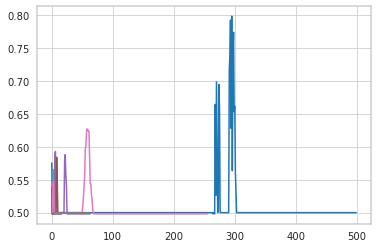

In [11]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")

# BrNet_CF_free_conditioned

In [12]:
c = CI.confounder()
model = Models.Br_Net_CF_free(alpha=None)
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet CF free conditioned"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params, conditioning=0)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-15 13:05:20,198	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-15 13:05:22,996	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(ImplicitFunc pid=4101741) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


== Status ==
Current time: 2022-07-15 13:05:30 (running for 00:00:09.93)
Memory usage on this node: 18.6/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 256.000: None | Iter 64.000: None | Iter 16.000: None | Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/10.1 GiB heap, 0.0/5.05 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_13-05-20
Number of trials: 17/30 (16 PENDING, 1 RUNNING)
+------------------------+----------+------------------------+----------+--------------+-----------+----------------+
| Trial name             | status   | loc                    |    alpha |   batch_size |        lr |   weight_decay |
|------------------------+----------+------------------------+----------+--------------+-----------+----------------|
| train_tune_043ab_00000 | RUNNING  | 192.168.178.26:4101741 | 0.281227 |          128 | 0.0441387 |     0.00277457 |
| train_tune_043ab_00001 | PENDING  |                        | 0.45186

(ImplicitFunc pid=4101741) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4101741) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00000_0_alpha=0.2812,batch_size=128,lr=0.0441,weight_decay=0.0028_2022-07-15_13-05-22/wandb/run-20220715_130526-043ab_00000
(ImplicitFunc pid=4101741) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4101741) wandb: Syncing run train_tune_043ab_00000
(ImplicitFunc pid=4101741) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4101741) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00000


Result for train_tune_043ab_00000:
  date: 2022-07-15_13-05-30
  done: false
  experiment_id: d8d21d2099f8401f85da2c6174d66820
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.6005859375
  node_ip: 192.168.178.26
  pid: 4101741
  time_since_restore: 0.24213719367980957
  time_this_iter_s: 0.24213719367980957
  time_total_s: 0.24213719367980957
  timestamp: 1657883130
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00000
  warmup_time: 4.698719501495361
  
Result for train_tune_043ab_00000:
  date: 2022-07-15_13-05-38
  done: false
  experiment_id: d8d21d2099f8401f85da2c6174d66820
  hostname: fedora
  iterations_since_restore: 14
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101741
  time_since_restore: 8.480823993682861
  time_this_iter_s: 0.5045125484466553
  time_total_s: 8.480823993682861
  timestamp: 1657883138
  timesteps_since_restore: 0
  training_iteration: 14
  trial_id: 043ab_00000
  warmup_time: 4.698719501495361
  


(ImplicitFunc pid=4101901) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4101906) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4101903) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4101908) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4101910) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4101914) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4101933) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4101916) wandb: Currently logg

Result for train_tune_043ab_00000:
  date: 2022-07-15_13-05-44
  done: false
  experiment_id: d8d21d2099f8401f85da2c6174d66820
  hostname: fedora
  iterations_since_restore: 33
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101741
  time_since_restore: 13.907725095748901
  time_this_iter_s: 0.5411996841430664
  time_total_s: 13.907725095748901
  timestamp: 1657883144
  timesteps_since_restore: 0
  training_iteration: 33
  trial_id: 043ab_00000
  warmup_time: 4.698719501495361
  


(ImplicitFunc pid=4101901) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4101901) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00001_1_alpha=0.4519,batch_size=256,lr=0.0013,weight_decay=0.0000_2022-07-15_13-05-30/wandb/run-20220715_130539-043ab_00001
(ImplicitFunc pid=4101901) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4101901) wandb: Syncing run train_tune_043ab_00001
(ImplicitFunc pid=4101901) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4101901) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00001
(ImplicitFunc pid=4101906) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4101906) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00003_3_alpha=0.6351,batch_size=256,lr=0.0001,weight_decay=0.0040_2022-07-15_13-05-30/wandb/run-

Result for train_tune_043ab_00001:
  date: 2022-07-15_13-05-46
  done: true
  experiment_id: 47976134694442048d6bc4ac09423fe5
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101901
  time_since_restore: 0.7130734920501709
  time_this_iter_s: 0.7130734920501709
  time_total_s: 0.7130734920501709
  timestamp: 1657883146
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00001
  warmup_time: 7.696206092834473
  
Result for train_tune_043ab_00003:
  date: 2022-07-15_13-05-46
  done: true
  experiment_id: 2bd131a892d945e49c08bddc8531845b
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101906
  time_since_restore: 0.6061732769012451
  time_this_iter_s: 0.6061732769012451
  time_total_s: 0.6061732769012451
  timestamp: 1657883146
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00003
  warmup_time: 7.650317668914795
  
Result for train_tune_

(ImplicitFunc pid=4101914) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4101914) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00006_6_alpha=0.9238,batch_size=128,lr=0.0001,weight_decay=0.0032_2022-07-15_13-05-31/wandb/run-20220715_130540-043ab_00006
(ImplicitFunc pid=4101914) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4101914) wandb: Syncing run train_tune_043ab_00006
(ImplicitFunc pid=4101914) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4101914) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00006
(ImplicitFunc pid=4101933) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4101933) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00008_8_alpha=0.5512,batch_size=128,lr=0.0001,weight_decay=0.0001_2022-07-15_13-05-31/wandb/run-

Result for train_tune_043ab_00016:
  date: 2022-07-15_13-05-47
  done: true
  experiment_id: 47976134694442048d6bc4ac09423fe5
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101901
  time_since_restore: 0.6327908039093018
  time_this_iter_s: 0.6327908039093018
  time_total_s: 0.6327908039093018
  timestamp: 1657883147
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00016
  warmup_time: 7.696206092834473
  
(train_tune pid=4101914) 


(ImplicitFunc pid=4101916) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4101916) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00007_7_alpha=0.5286,batch_size=128,lr=0.0015,weight_decay=0.0038_2022-07-15_13-05-31/wandb/run-20220715_130541-043ab_00007
(ImplicitFunc pid=4101916) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4101916) wandb: Syncing run train_tune_043ab_00007
(ImplicitFunc pid=4101916) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4101916) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00007
(ImplicitFunc pid=4101986) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4101986) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00010_10_alpha=0.0854,batch_size=32,lr=0.0007,weight_decay=0.0000_2022-07-15_13-05-32/wandb/run-

Result for train_tune_043ab_00017:
  date: 2022-07-15_13-05-47
  done: true
  experiment_id: 2bd131a892d945e49c08bddc8531845b
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101906
  time_since_restore: 0.8096046447753906
  time_this_iter_s: 0.8096046447753906
  time_total_s: 0.8096046447753906
  timestamp: 1657883147
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00017
  warmup_time: 7.650317668914795
  
Result for train_tune_043ab_00005:
  date: 2022-07-15_13-05-47
  done: true
  experiment_id: b53a6b8c013f4d8399bd4021474a4b18
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101910
  time_since_restore: 0.9041812419891357
  time_this_iter_s: 0.9041812419891357
  time_total_s: 0.9041812419891357
  timestamp: 1657883147
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00005
  warmup_time: 7.78862738609314
  
Result 

(ImplicitFunc pid=4101959) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4101959) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00009_9_alpha=0.8239,batch_size=128,lr=0.0010,weight_decay=0.0026_2022-07-15_13-05-31/wandb/run-20220715_130541-043ab_00009
(ImplicitFunc pid=4101959) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4101959) wandb: Syncing run train_tune_043ab_00009
(ImplicitFunc pid=4101959) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4101959) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00009


Result for train_tune_043ab_00018:
  date: 2022-07-15_13-05-48
  done: false
  experiment_id: 162cc3258dc94418ae0796d859f4fd7f
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101903
  time_since_restore: 0.9332442283630371
  time_this_iter_s: 0.9332442283630371
  time_total_s: 0.9332442283630371
  timestamp: 1657883148
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00018
  warmup_time: 7.679002046585083
  
Result for train_tune_043ab_00008:
  date: 2022-07-15_13-05-48
  done: false
  experiment_id: 725c138395cd4fb3a49ff177d19917cc
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101933
  time_since_restore: 0.7291049957275391
  time_this_iter_s: 0.7291049957275391
  time_total_s: 0.7291049957275391
  timestamp: 1657883148
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00008
  warmup_time: 7.687682390213013
  
Result for train_tun

(ImplicitFunc pid=4102071) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4102071) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00013_13_alpha=0.3853,batch_size=32,lr=0.0005,weight_decay=0.0003_2022-07-15_13-05-32/wandb/run-20220715_130541-043ab_00013
(ImplicitFunc pid=4102071) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4102071) wandb: Syncing run train_tune_043ab_00013
(ImplicitFunc pid=4102071) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4102071) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00013
(ImplicitFunc pid=4102040) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4102040) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00012_12_alpha=0.3260,batch_size=32,lr=0.0001,weight_decay=0.0916_2022-07-15_13-05-32/wandb/run-

Result for train_tune_043ab_00019:
  date: 2022-07-15_13-05-48
  done: true
  experiment_id: 47976134694442048d6bc4ac09423fe5
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101901
  time_since_restore: 0.9888317584991455
  time_this_iter_s: 0.9888317584991455
  time_total_s: 0.9888317584991455
  timestamp: 1657883148
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00019
  warmup_time: 7.696206092834473
  
Result for train_tune_043ab_00020:
  date: 2022-07-15_13-05-48
  done: false
  experiment_id: 2bd131a892d945e49c08bddc8531845b
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101906
  time_since_restore: 0.7988028526306152
  time_this_iter_s: 0.7988028526306152
  time_total_s: 0.7988028526306152
  timestamp: 1657883148
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00020
  warmup_time: 7.650317668914795
  
Result for tr

(ImplicitFunc pid=4102085) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4102085) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00014_14_alpha=0.5487,batch_size=32,lr=0.0002,weight_decay=0.0030_2022-07-15_13-05-32/wandb/run-20220715_130541-043ab_00014
(ImplicitFunc pid=4102085) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4102085) wandb: Syncing run train_tune_043ab_00014
(ImplicitFunc pid=4102085) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4102085) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00014


Result for train_tune_043ab_00021:
  date: 2022-07-15_13-05-48
  done: false
  experiment_id: b53a6b8c013f4d8399bd4021474a4b18
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101910
  time_since_restore: 1.01060152053833
  time_this_iter_s: 1.01060152053833
  time_total_s: 1.01060152053833
  timestamp: 1657883148
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00021
  warmup_time: 7.78862738609314
  
Result for train_tune_043ab_00010:
  date: 2022-07-15_13-05-49
  done: false
  experiment_id: 0bce0e3ebbc04e84a30753b92c6a8d26
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101986
  time_since_restore: 0.9985742568969727
  time_this_iter_s: 0.9985742568969727
  time_total_s: 0.9985742568969727
  timestamp: 1657883149
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00010
  warmup_time: 7.721931457519531
  


(ImplicitFunc pid=4102121) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4102121) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00015_15_alpha=0.5141,batch_size=128,lr=0.0004,weight_decay=0.0000_2022-07-15_13-05-33/wandb/run-20220715_130542-043ab_00015
(ImplicitFunc pid=4102121) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4102121) wandb: Syncing run train_tune_043ab_00015
(ImplicitFunc pid=4102121) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4102121) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00015


Result for train_tune_043ab_00009:
  date: 2022-07-15_13-05-49
  done: false
  experiment_id: d362a3a6205a40a881248238a23e2ff6
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101959
  time_since_restore: 1.1393523216247559
  time_this_iter_s: 1.1393523216247559
  time_total_s: 1.1393523216247559
  timestamp: 1657883149
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00009
  warmup_time: 7.8859381675720215
  
Result for train_tune_043ab_00011:
  date: 2022-07-15_13-05-49
  done: false
  experiment_id: c53fb3c2193b4e3ab9ca478ee085b8b6
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101998
  time_since_restore: 0.6261231899261475
  time_this_iter_s: 0.6261231899261475
  time_total_s: 0.6261231899261475
  timestamp: 1657883149
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 043ab_00011
  warmup_time: 8.090242624282837
  
Result for train_tu

(train_tune pid=4101986) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4101986) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00000:
  date: 2022-07-15_13-06-05
  done: false
  experiment_id: d8d21d2099f8401f85da2c6174d66820
  hostname: fedora
  iterations_since_restore: 68
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101741
  time_since_restore: 34.89638638496399
  time_this_iter_s: 0.3997230529785156
  time_total_s: 34.89638638496399
  timestamp: 1657883165
  timesteps_since_restore: 0
  training_iteration: 68
  trial_id: 043ab_00000
  warmup_time: 4.698719501495361
  
Result for train_tune_043ab_00022:
  date: 2022-07-15_13-06-05
  done: false
  experiment_id: 47976134694442048d6bc4ac09423fe5
  hostname: fedora
  iterations_since_restore: 29
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101901
  time_since_restore: 16.642735958099365
  time_this_iter_s: 0.3503565788269043
  time_total_s: 16.642735958099365
  timestamp: 1657883165
  timesteps_since_restore: 0
  training_iteration: 29
  trial_id: 043ab_00022
  warmup_time: 7.696206092834473
  


(train_tune pid=4101986) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4101986) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)f 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101986) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101986) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4102085) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4101986) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4101986) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101986) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101986) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB ded

Result for train_tune_043ab_00012:
  date: 2022-07-15_13-06-06
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 22
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 17.85963463783264
  time_this_iter_s: 0.4806208610534668
  time_total_s: 17.85963463783264
  timestamp: 1657883166
  timesteps_since_restore: 0
  training_iteration: 22
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  
Result for train_tune_043ab_00027:
  date: 2022-07-15_13-06-07
  done: false
  experiment_id: bf93c3c0f68444cc911f7191210eb82f
  hostname: fedora
  iterations_since_restore: 22
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101916
  time_since_restore: 11.412238597869873
  time_this_iter_s: 0.45760488510131836
  time_total_s: 11.412238597869873
  timestamp: 1657883167
  timesteps_since_restore: 0
  training_iteration: 22
  trial_id: 043ab_00027
  warmup_time: 7.863023042678833
  


(train_tune pid=4101986) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: / 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)
(train_tune pid=4102085) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb: / 0.010 MB of 0.013 MB uploaded (0.000 MB deduped)f 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: \ 0.013 MB of 0.013 MB upload

Result for train_tune_043ab_00024:
  date: 2022-07-15_13-06-08
  done: false
  experiment_id: d362a3a6205a40a881248238a23e2ff6
  hostname: fedora
  iterations_since_restore: 23
  mean_accuracy: 0.59765625
  node_ip: 192.168.178.26
  pid: 4101959
  time_since_restore: 16.113170862197876
  time_this_iter_s: 0.5223767757415771
  time_total_s: 16.113170862197876
  timestamp: 1657883168
  timesteps_since_restore: 0
  training_iteration: 23
  trial_id: 043ab_00024
  warmup_time: 7.8859381675720215
  


(train_tune pid=4102085) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102085) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00018:
  date: 2022-07-15_13-06-08
  done: false
  experiment_id: 162cc3258dc94418ae0796d859f4fd7f
  hostname: fedora
  iterations_since_restore: 40
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101903
  time_since_restore: 21.326467752456665
  time_this_iter_s: 0.7130658626556396
  time_total_s: 21.326467752456665
  timestamp: 1657883168
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: 043ab_00018
  warmup_time: 7.679002046585083
  


(train_tune pid=4102085) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101986) wandb: 
(train_tune pid=4101986) wandb: Run history:
(train_tune pid=4101986) wandb: classification_accuracy ▁▁▁▁▁█▆▁▁▁▁▁▁▁▁▁▁▁
(train_tune pid=4101986) wandb:     confounder_accuracy ▁██▁▁▅▃███████████
(train_tune pid=4101986) wandb: 
(train_tune pid=4101986) wandb: Run summary:
(train_tune pid=4101986) wandb: classification_accuracy 0.49805
(train_tune pid=4101986) wandb:     confounder_accuracy 1.0
(train_tune pid=4101986) wandb: 
(train_tune pid=4101986) wandb: Synced train_tune_043ab_00010: https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00010
(train_tune pid=4101986) wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
(train_tune pid=4101986) wandb: Find logs at: /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00010_10_alpha=0.0854,batch_size=32,lr=0.0007,weight_decay=0.0000_2022-07-15_13-05-32/wandb/run-

Result for train_tune_043ab_00004:
  date: 2022-07-15_13-06-09
  done: false
  experiment_id: a6699b7ee13d48168ba0621c89aa32aa
  hostname: fedora
  iterations_since_restore: 28
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101908
  time_since_restore: 22.490736961364746
  time_this_iter_s: 0.5539214611053467
  time_total_s: 22.490736961364746
  timestamp: 1657883169
  timesteps_since_restore: 0
  training_iteration: 28
  trial_id: 043ab_00004
  warmup_time: 7.8943705558776855
  


wandb:                                                                                 deduped)


Result for train_tune_043ab_00006:
  date: 2022-07-15_13-06-09
  done: false
  experiment_id: 0bcf8d3f02034f389c07ae50ccedec90
  hostname: fedora
  iterations_since_restore: 40
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101914
  time_since_restore: 22.237656831741333
  time_this_iter_s: 0.7051911354064941
  time_total_s: 22.237656831741333
  timestamp: 1657883169
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: 043ab_00006
  warmup_time: 8.007397890090942
  
Result for train_tune_043ab_00008:
  date: 2022-07-15_13-06-10
  done: false
  experiment_id: 725c138395cd4fb3a49ff177d19917cc
  hostname: fedora
  iterations_since_restore: 40
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101933
  time_since_restore: 22.8797128200531
  time_this_iter_s: 0.7651932239532471
  time_total_s: 22.8797128200531
  timestamp: 1657883170
  timesteps_since_restore: 0
  training_iteration: 40
  trial_id: 043ab_00008
  warmup_time: 7.687682390213013
  
Result for train_tun

(train_tune pid=4102085) wandb: 
(train_tune pid=4102085) wandb: Run history:
(train_tune pid=4102085) wandb: classification_accuracy ▁▁▁▁▁▁█▂▁▁▁▁▁▁▁
(train_tune pid=4102085) wandb:     confounder_accuracy ▁▁▁▁▁▁▄████████
(train_tune pid=4102085) wandb: 
(train_tune pid=4102085) wandb: Run summary:
(train_tune pid=4102085) wandb: classification_accuracy 0.49805
(train_tune pid=4102085) wandb:     confounder_accuracy 1.0
(train_tune pid=4102085) wandb: 
(train_tune pid=4102085) wandb: Synced train_tune_043ab_00014: https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00014
(train_tune pid=4102085) wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
(train_tune pid=4102085) wandb: Find logs at: ./wandb/run-20220715_130541-043ab_00014/logs


Result for train_tune_043ab_00012:
  date: 2022-07-15_13-06-11
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 32
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 23.185677766799927
  time_this_iter_s: 0.601123571395874
  time_total_s: 23.185677766799927
  timestamp: 1657883171
  timesteps_since_restore: 0
  training_iteration: 32
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  
Result for train_tune_043ab_00027:
  date: 2022-07-15_13-06-12
  done: false
  experiment_id: bf93c3c0f68444cc911f7191210eb82f
  hostname: fedora
  iterations_since_restore: 35
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101916
  time_since_restore: 16.75923991203308
  time_this_iter_s: 0.35974597930908203
  time_total_s: 16.75923991203308
  timestamp: 1657883172
  timesteps_since_restore: 0
  training_iteration: 35
  trial_id: 043ab_00027
  warmup_time: 7.863023042678833
  
Result for train_t

(train_tune pid=4101933) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4101933) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4101933) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4101933) wandb: | 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4101933) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101933) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101933) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101933) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101933) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101933) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101933) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101933) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_

Result for train_tune_043ab_00024:
  date: 2022-07-15_13-06-24
  done: false
  experiment_id: d362a3a6205a40a881248238a23e2ff6
  hostname: fedora
  iterations_since_restore: 57
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101959
  time_since_restore: 32.02405643463135
  time_this_iter_s: 0.4117403030395508
  time_total_s: 32.02405643463135
  timestamp: 1657883184
  timesteps_since_restore: 0
  training_iteration: 57
  trial_id: 043ab_00024
  warmup_time: 7.8859381675720215
  


(train_tune pid=4101933) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00018:
  date: 2022-07-15_13-06-24
  done: false
  experiment_id: 162cc3258dc94418ae0796d859f4fd7f
  hostname: fedora
  iterations_since_restore: 88
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101903
  time_since_restore: 37.02944302558899
  time_this_iter_s: 0.2720620632171631
  time_total_s: 37.02944302558899
  timestamp: 1657883184
  timesteps_since_restore: 0
  training_iteration: 88
  trial_id: 043ab_00018
  warmup_time: 7.679002046585083
  


(train_tune pid=4101910) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4101910) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4101910) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)


Result for train_tune_043ab_00004:
  date: 2022-07-15_13-06-25
  done: false
  experiment_id: a6699b7ee13d48168ba0621c89aa32aa
  hostname: fedora
  iterations_since_restore: 60
  mean_accuracy: 0.5009765625
  node_ip: 192.168.178.26
  pid: 4101908
  time_since_restore: 38.43484449386597
  time_this_iter_s: 0.39562249183654785
  time_total_s: 38.43484449386597
  timestamp: 1657883185
  timesteps_since_restore: 0
  training_iteration: 60
  trial_id: 043ab_00004
  warmup_time: 7.8943705558776855
  


(train_tune pid=4101910) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101910) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101910) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101910) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00006:
  date: 2022-07-15_13-06-25
  done: false
  experiment_id: 0bcf8d3f02034f389c07ae50ccedec90
  hostname: fedora
  iterations_since_restore: 83
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101914
  time_since_restore: 38.19268846511841
  time_this_iter_s: 0.37917065620422363
  time_total_s: 38.19268846511841
  timestamp: 1657883185
  timesteps_since_restore: 0
  training_iteration: 83
  trial_id: 043ab_00006
  warmup_time: 8.007397890090942
  


(train_tune pid=4101910) wandb: | 0.010 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101910) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101933) wandb: 
(train_tune pid=4101933) wandb: Run history:
(train_tune pid=4101933) wandb: classification_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▇▇█▆▄▂▂▁▂▁▁
(train_tune pid=4101933) wandb:     confounder_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▄▆▇▇██████
(train_tune pid=4101933) wandb: 
(train_tune pid=4101933) wandb: Run summary:
(train_tune pid=4101933) wandb: classification_accuracy 0.49805
(train_tune pid=4101933) wandb:     confounder_accuracy 1.0
(train_tune pid=4101933) wandb: 
(train_tune pid=4101933) wandb: Synced train_tune_043ab_00008: https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00008
(train_tune pid=4101933) wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
(train_tune pid=4101933) wandb: Find logs at: ./wandb/run-20220715_130540-043ab_00008/l

Result for train_tune_043ab_00022:
  date: 2022-07-15_13-06-25
  done: false
  experiment_id: 47976134694442048d6bc4ac09423fe5
  hostname: fedora
  iterations_since_restore: 90
  mean_accuracy: 0.5556640625
  node_ip: 192.168.178.26
  pid: 4101901
  time_since_restore: 37.26649308204651
  time_this_iter_s: 0.2842884063720703
  time_total_s: 37.26649308204651
  timestamp: 1657883185
  timesteps_since_restore: 0
  training_iteration: 90
  trial_id: 043ab_00022
  warmup_time: 7.696206092834473
  


(train_tune pid=4101910) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101910) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101910) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101910) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101910) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00000:
  date: 2022-07-15_13-06-26
  done: false
  experiment_id: d8d21d2099f8401f85da2c6174d66820
  hostname: fedora
  iterations_since_restore: 127
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101741
  time_since_restore: 55.96577334403992
  time_this_iter_s: 0.3014953136444092
  time_total_s: 55.96577334403992
  timestamp: 1657883186
  timesteps_since_restore: 0
  training_iteration: 127
  trial_id: 043ab_00000
  warmup_time: 4.698719501495361
  


(train_tune pid=4101910) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00024:
  date: 2022-07-15_13-06-27
  done: true
  experiment_id: d362a3a6205a40a881248238a23e2ff6
  hostname: fedora
  iterations_since_restore: 64
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101959
  time_since_restore: 35.0605046749115
  time_this_iter_s: 0.4807136058807373
  time_total_s: 35.0605046749115
  timestamp: 1657883187
  timesteps_since_restore: 0
  training_iteration: 64
  trial_id: 043ab_00024
  warmup_time: 7.8859381675720215
  


(train_tune pid=4101910) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00012:
  date: 2022-07-15_13-06-27
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 64
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 38.83612251281738
  time_this_iter_s: 0.40428853034973145
  time_total_s: 38.83612251281738
  timestamp: 1657883187
  timesteps_since_restore: 0
  training_iteration: 64
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  


wandb:                                                                                 deduped)


Result for train_tune_043ab_00027:
  date: 2022-07-15_13-06-27
  done: false
  experiment_id: bf93c3c0f68444cc911f7191210eb82f
  hostname: fedora
  iterations_since_restore: 76
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101916
  time_since_restore: 32.332937717437744
  time_this_iter_s: 0.3061072826385498
  time_total_s: 32.332937717437744
  timestamp: 1657883187
  timesteps_since_restore: 0
  training_iteration: 76
  trial_id: 043ab_00027
  warmup_time: 7.863023042678833
  


(train_tune pid=4101910) wandb: 
(train_tune pid=4101910) wandb: Run history:
(train_tune pid=4101910) wandb: classification_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄█▇▄▃▂▁▁▁▁▁▁▁▁
(train_tune pid=4101910) wandb:     confounder_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▄▆▇██████████
(train_tune pid=4101910) wandb: 
(train_tune pid=4101910) wandb: Run summary:
(train_tune pid=4101910) wandb: classification_accuracy 0.49805
(train_tune pid=4101910) wandb:     confounder_accuracy 1.0
(train_tune pid=4101910) wandb: 
(train_tune pid=4101910) wandb: Synced train_tune_043ab_00005: https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00005
(train_tune pid=4101910) wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
(train_tune pid=4101910) wandb: Find logs at: /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00005_5_alpha=0.5193,batch_size=64,lr=0.0382,weight_decay=0.0008_2022-07-15_13-05-31/wandb/run-20220715_130540-043ab_00005/logs
(train_

Result for train_tune_043ab_00018:
  date: 2022-07-15_13-06-29
  done: false
  experiment_id: 162cc3258dc94418ae0796d859f4fd7f
  hostname: fedora
  iterations_since_restore: 107
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101903
  time_since_restore: 42.10943651199341
  time_this_iter_s: 0.23253726959228516
  time_total_s: 42.10943651199341
  timestamp: 1657883189
  timesteps_since_restore: 0
  training_iteration: 107
  trial_id: 043ab_00018
  warmup_time: 7.679002046585083
  


(train_tune pid=4101959) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00004:
  date: 2022-07-15_13-06-30
  done: false
  experiment_id: a6699b7ee13d48168ba0621c89aa32aa
  hostname: fedora
  iterations_since_restore: 73
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101908
  time_since_restore: 43.53739619255066
  time_this_iter_s: 0.3843264579772949
  time_total_s: 43.53739619255066
  timestamp: 1657883190
  timesteps_since_restore: 0
  training_iteration: 73
  trial_id: 043ab_00004
  warmup_time: 7.8943705558776855
  


wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)f 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101959) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00006:
  date: 2022-07-15_13-06-30
  done: false
  experiment_id: 0bcf8d3f02034f389c07ae50ccedec90
  hostname: fedora
  iterations_since_restore: 100
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101914
  time_since_restore: 43.3310706615448
  time_this_iter_s: 0.3223886489868164
  time_total_s: 43.3310706615448
  timestamp: 1657883190
  timesteps_since_restore: 0
  training_iteration: 100
  trial_id: 043ab_00006
  warmup_time: 8.007397890090942
  
Result for train_tune_043ab_00022:
  date: 2022-07-15_13-06-30
  done: false
  experiment_id: 47976134694442048d6bc4ac09423fe5
  hostname: fedora
  iterations_since_restore: 110
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101901
  time_since_restore: 42.29470872879028
  time_this_iter_s: 0.2597365379333496
  time_total_s: 42.29470872879028
  timestamp: 1657883190
  timesteps_since_restore: 0
  training_iteration: 110
  trial_id: 043ab_00022
  warmup_time: 7.696206092834473
  


(train_tune pid=4101959) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101959) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101959) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101959) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101959) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101959) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00000:
  date: 2022-07-15_13-06-31
  done: false
  experiment_id: d8d21d2099f8401f85da2c6174d66820
  hostname: fedora
  iterations_since_restore: 146
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101741
  time_since_restore: 61.14969801902771
  time_this_iter_s: 0.2431352138519287
  time_total_s: 61.14969801902771
  timestamp: 1657883191
  timesteps_since_restore: 0
  training_iteration: 146
  trial_id: 043ab_00000
  warmup_time: 4.698719501495361
  


(train_tune pid=4101959) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101959) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)


Result for train_tune_043ab_00012:
  date: 2022-07-15_13-06-32
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 77
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 43.98629689216614
  time_this_iter_s: 0.3706378936767578
  time_total_s: 43.98629689216614
  timestamp: 1657883192
  timesteps_since_restore: 0
  training_iteration: 77
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  
Result for train_tune_043ab_00027:
  date: 2022-07-15_13-06-33
  done: false
  experiment_id: bf93c3c0f68444cc911f7191210eb82f
  hostname: fedora
  iterations_since_restore: 93
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101916
  time_since_restore: 37.46671390533447
  time_this_iter_s: 0.29359960556030273
  time_total_s: 37.46671390533447
  timestamp: 1657883193
  timesteps_since_restore: 0
  training_iteration: 93
  trial_id: 043ab_00027
  warmup_time: 7.863023042678833
  


(train_tune pid=4101959) wandb: 
(train_tune pid=4101959) wandb: Run history:
(train_tune pid=4101959) wandb: classification_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅█▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
(train_tune pid=4101959) wandb:     confounder_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▅▇███████████████████████
(train_tune pid=4101959) wandb: 
(train_tune pid=4101959) wandb: Run summary:
(train_tune pid=4101959) wandb: classification_accuracy 0.49805
(train_tune pid=4101959) wandb:     confounder_accuracy 1.0
(train_tune pid=4101959) wandb: 
(train_tune pid=4101959) wandb: Synced train_tune_043ab_00009: https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00009
(train_tune pid=4101959) wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
(train_tune pid=4101959) wandb: Find logs at: /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00009_9_alpha=0.8239,batch_size=128,lr=0.0010,weight_decay=0.0026_2022-07-15_13-05-31/wandb/run-20220715_130541-043ab_00009/logs


Result for train_tune_043ab_00018:
  date: 2022-07-15_13-06-34
  done: false
  experiment_id: 162cc3258dc94418ae0796d859f4fd7f
  hostname: fedora
  iterations_since_restore: 127
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101903
  time_since_restore: 47.31409001350403
  time_this_iter_s: 0.26746582984924316
  time_total_s: 47.31409001350403
  timestamp: 1657883194
  timesteps_since_restore: 0
  training_iteration: 127
  trial_id: 043ab_00018
  warmup_time: 7.679002046585083
  
Result for train_tune_043ab_00004:
  date: 2022-07-15_13-06-35
  done: false
  experiment_id: a6699b7ee13d48168ba0621c89aa32aa
  hostname: fedora
  iterations_since_restore: 86
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101908
  time_since_restore: 48.590481996536255
  time_this_iter_s: 0.3587989807128906
  time_total_s: 48.590481996536255
  timestamp: 1657883195
  timesteps_since_restore: 0
  training_iteration: 86
  trial_id: 043ab_00004
  warmup_time: 7.8943705558776855
  
Result

(train_tune pid=4101901) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4101901) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00018:
  date: 2022-07-15_13-07-10
  done: false
  experiment_id: 162cc3258dc94418ae0796d859f4fd7f
  hostname: fedora
  iterations_since_restore: 273
  mean_accuracy: 0.4990234375
  node_ip: 192.168.178.26
  pid: 4101903
  time_since_restore: 83.58187007904053
  time_this_iter_s: 0.22331809997558594
  time_total_s: 83.58187007904053
  timestamp: 1657883230
  timesteps_since_restore: 0
  training_iteration: 273
  trial_id: 043ab_00018
  warmup_time: 7.679002046585083
  
Result for train_tune_043ab_00004:
  date: 2022-07-15_13-07-11
  done: false
  experiment_id: a6699b7ee13d48168ba0621c89aa32aa
  hostname: fedora
  iterations_since_restore: 185
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101908
  time_since_restore: 84.6178228855133
  time_this_iter_s: 0.33595895767211914
  time_total_s: 84.6178228855133
  timestamp: 1657883231
  timesteps_since_restore: 0
  training_iteration: 185
  trial_id: 043ab_00004
  warmup_time: 7.8943705558776855
 

(train_tune pid=4101901) wandb: \ 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4101901) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00006:
  date: 2022-07-15_13-07-11
  done: false
  experiment_id: 0bcf8d3f02034f389c07ae50ccedec90
  hostname: fedora
  iterations_since_restore: 253
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101914
  time_since_restore: 84.19803476333618
  time_this_iter_s: 0.24382615089416504
  time_total_s: 84.19803476333618
  timestamp: 1657883231
  timesteps_since_restore: 0
  training_iteration: 253
  trial_id: 043ab_00006
  warmup_time: 8.007397890090942
  


(train_tune pid=4101901) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101901) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)f 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101901) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101901) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101901) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00000:
  date: 2022-07-15_13-07-12
  done: false
  experiment_id: d8d21d2099f8401f85da2c6174d66820
  hostname: fedora
  iterations_since_restore: 300
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101741
  time_since_restore: 102.02883553504944
  time_this_iter_s: 0.2576479911804199
  time_total_s: 102.02883553504944
  timestamp: 1657883232
  timesteps_since_restore: 0
  training_iteration: 300
  trial_id: 043ab_00000
  warmup_time: 4.698719501495361
  
Result for train_tune_043ab_00006:
  date: 2022-07-15_13-07-12
  done: true
  experiment_id: 0bcf8d3f02034f389c07ae50ccedec90
  hostname: fedora
  iterations_since_restore: 256
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101914
  time_since_restore: 84.97315263748169
  time_this_iter_s: 0.25249671936035156
  time_total_s: 84.97315263748169
  timestamp: 1657883232
  timesteps_since_restore: 0
  training_iteration: 256
  trial_id: 043ab_00006
  warmup_time: 8.007397890090942
  


(train_tune pid=4101901) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101901) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)


Result for train_tune_043ab_00027:
  date: 2022-07-15_13-07-13
  done: false
  experiment_id: bf93c3c0f68444cc911f7191210eb82f
  hostname: fedora
  iterations_since_restore: 233
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101916
  time_since_restore: 78.21645498275757
  time_this_iter_s: 0.22987961769104004
  time_total_s: 78.21645498275757
  timestamp: 1657883233
  timesteps_since_restore: 0
  training_iteration: 233
  trial_id: 043ab_00027
  warmup_time: 7.863023042678833
  
Result for train_tune_043ab_00012:
  date: 2022-07-15_13-07-13
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 189
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 85.28454446792603
  time_this_iter_s: 0.2933061122894287
  time_total_s: 85.28454446792603
  timestamp: 1657883233
  timesteps_since_restore: 0
  training_iteration: 189
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  


(train_tune pid=4101901) wandb: 
(train_tune pid=4101901) wandb: Run history:
(train_tune pid=4101901) wandb: classification_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▃█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
(train_tune pid=4101901) wandb:     confounder_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▁▆██████████████████████████
(train_tune pid=4101901) wandb: 
(train_tune pid=4101901) wandb: Run summary:
(train_tune pid=4101901) wandb: classification_accuracy 0.49805
(train_tune pid=4101901) wandb:     confounder_accuracy 1.0
(train_tune pid=4101901) wandb: 
(train_tune pid=4101901) wandb: Synced train_tune_043ab_00001: https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00001
(train_tune pid=4101901) wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
(train_tune pid=4101901) wandb: Find logs at: /home/raffi/ray_results/train_tune_2022-07-15_13-05-20/train_tune_043ab_00001_1_alpha=0.4519,batch_size=256,lr=0.0013,weight_decay=0.0000_2022-07-15_13-05-30/wandb/run-20220715_130539-043ab_00001/logs
(train

Result for train_tune_043ab_00018:
  date: 2022-07-15_13-07-16
  done: false
  experiment_id: 162cc3258dc94418ae0796d859f4fd7f
  hostname: fedora
  iterations_since_restore: 296
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101903
  time_since_restore: 88.72869729995728
  time_this_iter_s: 0.26224684715270996
  time_total_s: 88.72869729995728
  timestamp: 1657883236
  timesteps_since_restore: 0
  training_iteration: 296
  trial_id: 043ab_00018
  warmup_time: 7.679002046585083
  


(train_tune pid=4101914) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101914) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101914) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101914) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101914) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101914) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00004:
  date: 2022-07-15_13-07-16
  done: false
  experiment_id: a6699b7ee13d48168ba0621c89aa32aa
  hostname: fedora
  iterations_since_restore: 201
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101908
  time_since_restore: 89.88833379745483
  time_this_iter_s: 0.31613755226135254
  time_total_s: 89.88833379745483
  timestamp: 1657883236
  timesteps_since_restore: 0
  training_iteration: 201
  trial_id: 043ab_00004
  warmup_time: 7.8943705558776855
  


(train_tune pid=4101914) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00000:
  date: 2022-07-15_13-07-17
  done: false
  experiment_id: d8d21d2099f8401f85da2c6174d66820
  hostname: fedora
  iterations_since_restore: 323
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101741
  time_since_restore: 107.22164559364319
  time_this_iter_s: 0.21755480766296387
  time_total_s: 107.22164559364319
  timestamp: 1657883237
  timesteps_since_restore: 0
  training_iteration: 323
  trial_id: 043ab_00000
  warmup_time: 4.698719501495361
  


(train_tune pid=4101914) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)


Result for train_tune_043ab_00027:
  date: 2022-07-15_13-07-18
  done: false
  experiment_id: bf93c3c0f68444cc911f7191210eb82f
  hostname: fedora
  iterations_since_restore: 253
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101916
  time_since_restore: 83.2730507850647
  time_this_iter_s: 0.21843194961547852
  time_total_s: 83.2730507850647
  timestamp: 1657883238
  timesteps_since_restore: 0
  training_iteration: 253
  trial_id: 043ab_00027
  warmup_time: 7.863023042678833
  
Result for train_tune_043ab_00012:
  date: 2022-07-15_13-07-18
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 205
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 90.36458587646484
  time_this_iter_s: 0.28633713722229004
  time_total_s: 90.36458587646484
  timestamp: 1657883238
  timesteps_since_restore: 0
  training_iteration: 205
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  


(train_tune pid=4101914) wandb: 
(train_tune pid=4101914) wandb: Run history:
(train_tune pid=4101914) wandb: classification_accuracy ▁▁▁▁▁▁▁▁█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
(train_tune pid=4101914) wandb:     confounder_accuracy ▁▁▁▁▁▁▁▁▄▇██████████████████████████████
(train_tune pid=4101914) wandb: 
(train_tune pid=4101914) wandb: Run summary:
(train_tune pid=4101914) wandb: classification_accuracy 0.49805
(train_tune pid=4101914) wandb:     confounder_accuracy 1.0
(train_tune pid=4101914) wandb: 
(train_tune pid=4101914) wandb: Synced train_tune_043ab_00006: https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00006
(train_tune pid=4101914) wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
(train_tune pid=4101914) wandb: Find logs at: ./wandb/run-20220715_130540-043ab_00006/logs


Result for train_tune_043ab_00018:
  date: 2022-07-15_13-07-21
  done: false
  experiment_id: 162cc3258dc94418ae0796d859f4fd7f
  hostname: fedora
  iterations_since_restore: 320
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101903
  time_since_restore: 93.82435941696167
  time_this_iter_s: 0.20461773872375488
  time_total_s: 93.82435941696167
  timestamp: 1657883241
  timesteps_since_restore: 0
  training_iteration: 320
  trial_id: 043ab_00018
  warmup_time: 7.679002046585083
  
Result for train_tune_043ab_00004:
  date: 2022-07-15_13-07-21
  done: false
  experiment_id: a6699b7ee13d48168ba0621c89aa32aa
  hostname: fedora
  iterations_since_restore: 218
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101908
  time_since_restore: 95.05876874923706
  time_this_iter_s: 0.3006865978240967
  time_total_s: 95.05876874923706
  timestamp: 1657883241
  timesteps_since_restore: 0
  training_iteration: 218
  trial_id: 043ab_00004
  warmup_time: 7.8943705558776855
 

(train_tune pid=4101908) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4101908) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4101908) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00018:
  date: 2022-07-15_13-07-36
  done: false
  experiment_id: 162cc3258dc94418ae0796d859f4fd7f
  hostname: fedora
  iterations_since_restore: 396
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101903
  time_since_restore: 109.1245801448822
  time_this_iter_s: 0.19122672080993652
  time_total_s: 109.1245801448822
  timestamp: 1657883256
  timesteps_since_restore: 0
  training_iteration: 396
  trial_id: 043ab_00018
  warmup_time: 7.679002046585083
  


(train_tune pid=4101908) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4101908) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101908) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101908) wandb: \ 0.003 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101908) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101908) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101908) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101908) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101908) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101908) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00000:
  date: 2022-07-15_13-07-38
  done: false
  experiment_id: d8d21d2099f8401f85da2c6174d66820
  hostname: fedora
  iterations_since_restore: 417
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101741
  time_since_restore: 127.755197763443
  time_this_iter_s: 0.24352312088012695
  time_total_s: 127.755197763443
  timestamp: 1657883258
  timesteps_since_restore: 0
  training_iteration: 417
  trial_id: 043ab_00000
  warmup_time: 4.698719501495361
  


(train_tune pid=4101908) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)


Result for train_tune_043ab_00012:
  date: 2022-07-15_13-07-39
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 272
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 110.97404670715332
  time_this_iter_s: 0.2578885555267334
  time_total_s: 110.97404670715332
  timestamp: 1657883259
  timesteps_since_restore: 0
  training_iteration: 272
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  
Result for train_tune_043ab_00027:
  date: 2022-07-15_13-07-39
  done: false
  experiment_id: bf93c3c0f68444cc911f7191210eb82f
  hostname: fedora
  iterations_since_restore: 339
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101916
  time_since_restore: 103.93705487251282
  time_this_iter_s: 0.20231890678405762
  time_total_s: 103.93705487251282
  timestamp: 1657883259
  timesteps_since_restore: 0
  training_iteration: 339
  trial_id: 043ab_00027
  warmup_time: 7.863023042678833
  


(train_tune pid=4101908) wandb: 
(train_tune pid=4101908) wandb: Run history:
(train_tune pid=4101908) wandb: classification_accuracy ▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
(train_tune pid=4101908) wandb:     confounder_accuracy ▁▁▁▁▁▁▁▁▁▁▇█████████████████████████████
(train_tune pid=4101908) wandb: 
(train_tune pid=4101908) wandb: Run summary:
(train_tune pid=4101908) wandb: classification_accuracy 0.49805
(train_tune pid=4101908) wandb:     confounder_accuracy 1.0
(train_tune pid=4101908) wandb: 
(train_tune pid=4101908) wandb: Synced train_tune_043ab_00004: https://wandb.ai/confounder_in_ml/Hyperparameters/runs/043ab_00004
(train_tune pid=4101908) wandb: Synced 6 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
(train_tune pid=4101908) wandb: Find logs at: ./wandb/run-20220715_130540-043ab_00004/logs


Result for train_tune_043ab_00018:
  date: 2022-07-15_13-07-41
  done: false
  experiment_id: 162cc3258dc94418ae0796d859f4fd7f
  hostname: fedora
  iterations_since_restore: 422
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4101903
  time_since_restore: 114.31132578849792
  time_this_iter_s: 0.175123929977417
  time_total_s: 114.31132578849792
  timestamp: 1657883261
  timesteps_since_restore: 0
  training_iteration: 422
  trial_id: 043ab_00018
  warmup_time: 7.679002046585083
  
Result for train_tune_043ab_00000:
  date: 2022-07-15_13-07-43
  done: false
  experiment_id: d8d21d2099f8401f85da2c6174d66820
  hostname: fedora
  iterations_since_restore: 442
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101741
  time_since_restore: 132.8481125831604
  time_this_iter_s: 0.23805809020996094
  time_total_s: 132.8481125831604
  timestamp: 1657883263
  timesteps_since_restore: 0
  training_iteration: 442
  trial_id: 043ab_00000
  warmup_time: 4.698719501495361
  
Result

(train_tune pid=4101741) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4101741) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4101741) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4101741) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101741) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101741) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101741) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101741) wandb: | 0.005 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101741) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101741) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101741) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101741) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_

Result for train_tune_043ab_00012:
  date: 2022-07-15_13-07-59
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 351
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 131.25581574440002
  time_this_iter_s: 0.21990084648132324
  time_total_s: 131.25581574440002
  timestamp: 1657883279
  timesteps_since_restore: 0
  training_iteration: 351
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  
Result for train_tune_043ab_00027:
  date: 2022-07-15_13-07-59
  done: false
  experiment_id: bf93c3c0f68444cc911f7191210eb82f
  hostname: fedora
  iterations_since_restore: 439
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101916
  time_since_restore: 124.22982907295227
  time_this_iter_s: 0.1795036792755127
  time_total_s: 124.22982907295227
  timestamp: 1657883279
  timesteps_since_restore: 0
  training_iteration: 439
  trial_id: 043ab_00027
  warmup_time: 7.863023042678833
  


(train_tune pid=4101903) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101903) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101903) wandb: \ 0.003 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)
(train_tune pid=4101903) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101903) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101903) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101903) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101903) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101903) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101903) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101903) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB 

Result for train_tune_043ab_00012:
  date: 2022-07-15_13-08-04
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 375
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 136.3824007511139
  time_this_iter_s: 0.23030686378479004
  time_total_s: 136.3824007511139
  timestamp: 1657883284
  timesteps_since_restore: 0
  training_iteration: 375
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  
Result for train_tune_043ab_00027:
  date: 2022-07-15_13-08-04
  done: false
  experiment_id: bf93c3c0f68444cc911f7191210eb82f
  hostname: fedora
  iterations_since_restore: 469
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4101916
  time_since_restore: 129.35283660888672
  time_this_iter_s: 0.17430782318115234
  time_total_s: 129.35283660888672
  timestamp: 1657883284
  timesteps_since_restore: 0
  training_iteration: 469
  trial_id: 043ab_00027
  warmup_time: 7.863023042678833
  
Result for t

(train_tune pid=4101916) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4101916) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)f 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_043ab_00012:
  date: 2022-07-15_13-08-15
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 427
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 146.44707250595093
  time_this_iter_s: 0.1821126937866211
  time_total_s: 146.44707250595093
  timestamp: 1657883295
  timesteps_since_restore: 0
  training_iteration: 427
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  


(train_tune pid=4101916) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)f 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4101916) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB 

Result for train_tune_043ab_00012:
  date: 2022-07-15_13-08-20
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 457
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 151.538556098938
  time_this_iter_s: 0.17055535316467285
  time_total_s: 151.538556098938
  timestamp: 1657883300
  timesteps_since_restore: 0
  training_iteration: 457
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  
Result for train_tune_043ab_00012:
  date: 2022-07-15_13-08-25
  done: false
  experiment_id: 4848d5e654d24ea6bf92c63a78dcc1c8
  hostname: fedora
  iterations_since_restore: 487
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4102040
  time_since_restore: 156.61343598365784
  time_this_iter_s: 0.17317819595336914
  time_total_s: 156.61343598365784
  timestamp: 1657883305
  timesteps_since_restore: 0
  training_iteration: 487
  trial_id: 043ab_00012
  warmup_time: 7.873065233230591
  
Result for tra

(train_tune pid=4102040) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4102040) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4102040) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4102040) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4102040) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102040) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102040) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102040) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102040) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)f 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102040) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4102040) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB ded

{'model': Br_Net_CF_free(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
   )
   (class_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
   (domain_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 500,
 'batch_size': 128,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.5285755689032852,
 'lr': 0.001458905356239198,
 'weight_decay': 0.00378

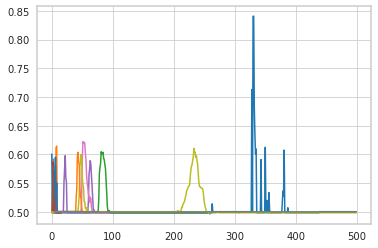

In [13]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")
#analysis.best_dataframe(metric="mean_accuracy", mode="max", scope="last-10-avg").plot()

# BrNet_DANN

In [ ]:
c = CI.confounder()
model = Models.Br_Net_DANN(alpha=None)
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet DANN"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-15 13:08:35,791	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-15 13:08:38,679	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(ImplicitFunc pid=4104449) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


== Status ==
Current time: 2022-07-15 13:08:46 (running for 00:00:10.06)
Memory usage on this node: 18.7/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 256.000: None | Iter 64.000: None | Iter 16.000: None | Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/10.1 GiB heap, 0.0/5.05 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_13-08-36
Number of trials: 17/30 (16 PENDING, 1 RUNNING)
+------------------------+----------+------------------------+----------+--------------+-----------+----------------+
| Trial name             | status   | loc                    |    alpha |   batch_size |        lr |   weight_decay |
|------------------------+----------+------------------------+----------+--------------+-----------+----------------|
| train_tune_78cfa_00000 | RUNNING  | 192.168.178.26:4104449 | 0.281227 |          128 | 0.0441387 |     0.00277457 |
| train_tune_78cfa_00001 | PENDING  |                        | 0.45186

(ImplicitFunc pid=4104449) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4104449) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-08-36/train_tune_78cfa_00000_0_alpha=0.2812,batch_size=128,lr=0.0441,weight_decay=0.0028_2022-07-15_13-08-38/wandb/run-20220715_130842-78cfa_00000
(ImplicitFunc pid=4104449) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4104449) wandb: Syncing run train_tune_78cfa_00000
(ImplicitFunc pid=4104449) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4104449) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/78cfa_00000


Result for train_tune_78cfa_00000:
  date: 2022-07-15_13-08-46
  done: false
  experiment_id: 77d3d0557ac642b1baf7a3d105982007
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4104449
  time_since_restore: 0.1804053783416748
  time_this_iter_s: 0.1804053783416748
  time_total_s: 0.1804053783416748
  timestamp: 1657883326
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 78cfa_00000
  warmup_time: 4.616259813308716
  
Result for train_tune_78cfa_00000:
  date: 2022-07-15_13-08-53
  done: false
  experiment_id: 77d3d0557ac642b1baf7a3d105982007
  hostname: fedora
  iterations_since_restore: 13
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4104449
  time_since_restore: 7.628299236297607
  time_this_iter_s: 0.39830875396728516
  time_total_s: 7.628299236297607
  timestamp: 1657883333
  timesteps_since_restore: 0
  training_iteration: 13
  trial_id: 78cfa_00000
  warmup_time: 4.616259813308716
  


(ImplicitFunc pid=4104548) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4104551) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4104553) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4104557) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4104555) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4104559) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4104578) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4104560) wandb: Currently logg

Result for train_tune_78cfa_00000:
  date: 2022-07-15_13-08-58
  done: false
  experiment_id: 77d3d0557ac642b1baf7a3d105982007
  hostname: fedora
  iterations_since_restore: 34
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4104449
  time_since_restore: 12.64729118347168
  time_this_iter_s: 0.2474510669708252
  time_total_s: 12.64729118347168
  timestamp: 1657883338
  timesteps_since_restore: 0
  training_iteration: 34
  trial_id: 78cfa_00000
  warmup_time: 4.616259813308716
  


(ImplicitFunc pid=4104551) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4104551) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-08-36/train_tune_78cfa_00002_2_alpha=0.8288,batch_size=256,lr=0.0454,weight_decay=0.0020_2022-07-15_13-08-46/wandb/run-20220715_130855-78cfa_00002
(ImplicitFunc pid=4104551) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4104551) wandb: Syncing run train_tune_78cfa_00002
(ImplicitFunc pid=4104551) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4104551) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/78cfa_00002
(ImplicitFunc pid=4104553) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4104553) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-08-36/train_tune_78cfa_00003_3_alpha=0.6351,batch_size=256,lr=0.0001,weight_decay=0.0040_2022-07-15_13-08-46/wandb/run-

Result for train_tune_78cfa_00002:
  date: 2022-07-15_13-09-02
  done: false
  experiment_id: c8a35b8e2dcd4c8b94f5cd3dcbc244be
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4104551
  time_since_restore: 0.6243636608123779
  time_this_iter_s: 0.6243636608123779
  time_total_s: 0.6243636608123779
  timestamp: 1657883342
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 78cfa_00002
  warmup_time: 7.6988043785095215
  
Result for train_tune_78cfa_00003:
  date: 2022-07-15_13-09-02
  done: false
  experiment_id: d40c10cf64544d60b0aadf73c85726c2
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4104553
  time_since_restore: 0.5523116588592529
  time_this_iter_s: 0.5523116588592529
  time_total_s: 0.5523116588592529
  timestamp: 1657883342
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 78cfa_00003
  warmup_time: 7.725350379943848
  
Result for train_tu

(ImplicitFunc pid=4104555) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4104555) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-08-36/train_tune_78cfa_00004_4_alpha=0.5425,batch_size=32,lr=0.0000,weight_decay=0.0261_2022-07-15_13-08-46/wandb/run-20220715_130856-78cfa_00004
(ImplicitFunc pid=4104555) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4104555) wandb: Syncing run train_tune_78cfa_00004
(ImplicitFunc pid=4104555) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4104555) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/78cfa_00004
(ImplicitFunc pid=4104559) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4104559) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-08-36/train_tune_78cfa_00006_6_alpha=0.9238,batch_size=128,lr=0.0001,weight_decay=0.0032_2022-07-15_13-08-46/wandb/run-2

Result for train_tune_78cfa_00005:
  date: 2022-07-15_13-09-03
  done: false
  experiment_id: d34b4f5a585f4eeba86d5a3c506097e4
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4104557
  time_since_restore: 0.7519831657409668
  time_this_iter_s: 0.7519831657409668
  time_total_s: 0.7519831657409668
  timestamp: 1657883343
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 78cfa_00005
  warmup_time: 7.73653769493103
  


(ImplicitFunc pid=4104578) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4104578) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-08-36/train_tune_78cfa_00008_8_alpha=0.5512,batch_size=128,lr=0.0001,weight_decay=0.0001_2022-07-15_13-08-47/wandb/run-20220715_130856-78cfa_00008
(ImplicitFunc pid=4104578) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4104578) wandb: Syncing run train_tune_78cfa_00008
(ImplicitFunc pid=4104578) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4104578) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/78cfa_00008
(ImplicitFunc pid=4104560) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4104560) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-08-36/train_tune_78cfa_00007_7_alpha=0.5286,batch_size=128,lr=0.0015,weight_decay=0.0038_2022-07-15_13-08-47/wandb/run-

Result for train_tune_78cfa_00000:
  date: 2022-07-15_13-09-03
  done: false
  experiment_id: 77d3d0557ac642b1baf7a3d105982007
  hostname: fedora
  iterations_since_restore: 45
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4104449
  time_since_restore: 17.657839059829712
  time_this_iter_s: 0.6160964965820312
  time_total_s: 17.657839059829712
  timestamp: 1657883343
  timesteps_since_restore: 0
  training_iteration: 45
  trial_id: 78cfa_00000
  warmup_time: 4.616259813308716
  
Result for train_tune_78cfa_00004:
  date: 2022-07-15_13-09-03
  done: false
  experiment_id: 4f63df2d14654d93b64ae2012052e1b5
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4104555
  time_since_restore: 0.7023327350616455
  time_this_iter_s: 0.7023327350616455
  time_total_s: 0.7023327350616455
  timestamp: 1657883343
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 78cfa_00004
  warmup_time: 7.968931436538696
  
Result for train_t

(ImplicitFunc pid=4104634) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4104634) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-08-36/train_tune_78cfa_00011_11_alpha=0.8131,batch_size=256,lr=0.0008,weight_decay=0.0101_2022-07-15_13-08-47/wandb/run-20220715_130857-78cfa_00011
(ImplicitFunc pid=4104634) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4104634) wandb: Syncing run train_tune_78cfa_00011
(ImplicitFunc pid=4104634) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4104634) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/78cfa_00011
(ImplicitFunc pid=4104674) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4104674) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_13-08-36/train_tune_78cfa_00013_13_alpha=0.3853,batch_size=32,lr=0.0005,weight_decay=0.0003_2022-07-15_13-08-48/wandb/run

Result for train_tune_78cfa_00007:
  date: 2022-07-15_13-09-04
  done: false
  experiment_id: 568a470067b4433ebdc6e68fb1f118fe
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4104560
  time_since_restore: 1.0201599597930908
  time_this_iter_s: 1.0201599597930908
  time_total_s: 1.0201599597930908
  timestamp: 1657883344
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 78cfa_00007
  warmup_time: 8.02262258529663
  
Result for train_tune_78cfa_00008:
  date: 2022-07-15_13-09-04
  done: false
  experiment_id: 0db304b114b84582b195f74ce1cdfad8
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4104578
  time_since_restore: 1.1371924877166748
  time_this_iter_s: 1.1371924877166748
  time_total_s: 1.1371924877166748
  timestamp: 1657883344
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 78cfa_00008
  warmup_time: 8.122827291488647
  
Result for train_tune

In [ ]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")